In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mydata=pd.read_csv("mly833.csv")
mydata

,year,month,rain
0,1959,11,193.0
1,1959,12,295.4
2,1960,1,127.9
3,1960,2,106.1
4,1960,3,53.9
...,...,...,...
717,2019,8,221.9
718,2019,9,166.3
719,2019,10,152.0
720,2019,11,142.5


In [3]:
tseries=mydata['rain']
tseries

0      193.0
1      295.4
2      127.9
3      106.1
4       53.9
       ...  
717    221.9
718    166.3
719    152.0
720    142.5
721    217.3
Name: rain, Length: 722, dtype: float64

In [4]:
type(tseries)

pandas.core.series.Series

In [5]:
# https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html
res = sm.tsa.ARMA(tseries, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10])

(array([78.09028704]), array([1.18734005e-12]))

In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.927739
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


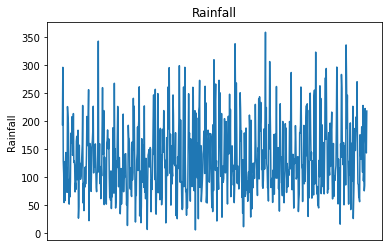

In [7]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Rainfall')
plt.title("Rainfall")
plt.show()

In [8]:
df=pd.DataFrame(tseries)
df

,rain
0,193.0
1,295.4
2,127.9
3,106.1
4,53.9
...,...
717,221.9
718,166.3
719,152.0
720,142.5


In [9]:
df = df[:712]

In [10]:
df

,rain
0,193.0
1,295.4
2,127.9
3,106.1
4,53.9
...,...
707,131.2
708,150.6
709,189.1
710,139.1


In [11]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
df

,rain
0,193.0
1,295.4
2,127.9
3,106.1
4,53.9
...,...
707,131.2
708,150.6
709,189.1
710,139.1


In [13]:
# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.53242707],
       [0.82242991],
       [0.34806004],
       [0.28632116],
       [0.13848768],
       [0.34494477],
       [0.14811668],
       [0.33050127],
       [0.39139054],
       [0.31067686],
       [0.31634098],
       [0.19003115],
       [0.62390258],
       [0.5865194 ],
       [0.54007363],
       [0.36731804],
       [0.13055792],
       [0.25828377],
       [0.16737468],
       [0.24468989],
       [0.48937978],
       [0.44038516],
       [0.4709714 ],
       [0.57320872],
       [0.37751345],
       [0.39025772],
       [0.58850184],
       [0.34211272],
       [0.35032569],
       [0.3268196 ],
       [0.1922968 ],
       [0.23760974],
       [0.20504106],
       [0.44916454],
       [0.47352025],
       [0.25403568],
       [0.42367601],
       [0.50438969],
       [0.05947324],
       [0.11894647],
       [0.42877372],
       [0.26649674],
       [0.3367318 ],
       [0.25630133],
       [0.27131124],
       [0.32427074],
       [0.36731804],
       [0.429

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 120
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [15]:
X_train

array([[0.53242707, 0.82242991, 0.34806004, ..., 0.21042198, 0.16765789,
        0.28518833],
       [0.82242991, 0.34806004, 0.28632116, ..., 0.16765789, 0.28518833,
        0.51713396],
       [0.34806004, 0.28632116, 0.13848768, ..., 0.28518833, 0.51713396,
        0.49079581],
       ...,
       [0.25035401, 0.06513735, 0.55451713, ..., 0.49221184, 0.48994619,
        0.53044463],
       [0.06513735, 0.55451713, 0.23789295, ..., 0.48994619, 0.53044463,
        0.72302464],
       [0.55451713, 0.23789295, 0.10676862, ..., 0.53044463, 0.72302464,
        0.56046446]])

In [16]:
Y_train

array([0.51713396, 0.49079581, 0.18606627, 0.74199943, 0.38770886,
       0.41121495, 0.1107335 , 0.14811668, 0.34862645, 0.31464174,
       0.48314925, 0.62475219, 0.55168508, 0.21835174, 0.35542339,
       0.36618522, 0.24072501, 0.0815633 , 0.15463042, 0.31067686,
       0.13084112, 0.20419145, 0.23024639, 0.30331351, 0.58595299,
       0.19314642, 0.29651657, 0.2645143 , 0.38176154, 0.3845936 ,
       0.38572642, 0.24752195, 0.12687624, 0.18210139, 0.02237327,
       0.15491362, 0.52931181, 0.46587369, 0.46304163, 0.41036534,
       0.21750212, 0.20589068, 0.31407533, 0.17558765, 0.16907392,
       0.44463325, 0.25290286, 0.29085245, 0.66581705, 0.40611725,
       0.62588502, 0.3990371 , 0.23845936, 0.03993203, 0.19088077,
       0.17417162, 0.35287454, 0.38572642, 0.52081563, 0.30048145,
       0.51600113, 0.55848202, 0.72387426, 0.07080147, 0.1874823 ,
       0.29679977, 0.03625035, 0.12064571, 0.4613424 , 0.24129142,
       0.33050127, 0.40073634, 0.42764089, 0.21495327, 0.62730

Train on 358 samples, validate on 90 samples
Epoch 1/100
358/358 - 0s - loss: 0.1882 - val_loss: 0.1623
Epoch 2/100
358/358 - 0s - loss: 0.1583 - val_loss: 0.1348
Epoch 3/100
358/358 - 0s - loss: 0.1326 - val_loss: 0.1113
Epoch 4/100
358/358 - 0s - loss: 0.1105 - val_loss: 0.0913
Epoch 5/100
358/358 - 0s - loss: 0.0917 - val_loss: 0.0745
Epoch 6/100
358/358 - 0s - loss: 0.0759 - val_loss: 0.0608
Epoch 7/100
358/358 - 0s - loss: 0.0629 - val_loss: 0.0499
Epoch 8/100
358/358 - 0s - loss: 0.0526 - val_loss: 0.0417
Epoch 9/100
358/358 - 0s - loss: 0.0448 - val_loss: 0.0359
Epoch 10/100
358/358 - 0s - loss: 0.0394 - val_loss: 0.0324
Epoch 11/100
358/358 - 0s - loss: 0.0360 - val_loss: 0.0308
Epoch 12/100
358/358 - 0s - loss: 0.0343 - val_loss: 0.0306
Epoch 13/100
358/358 - 0s - loss: 0.0341 - val_loss: 0.0314
Epoch 14/100
358/358 - 0s - loss: 0.0348 - val_loss: 0.0327
Epoch 15/100
358/358 - 0s - loss: 0.0359 - val_loss: 0.0341
Epoch 16/100
358/358 - 0s - loss: 0.0371 - val_loss: 0.0352
Epoc

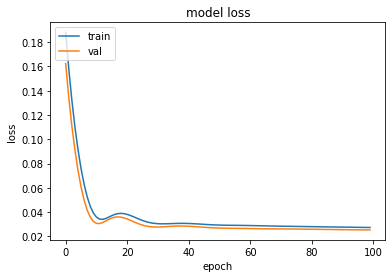

In [17]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=712, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [19]:
trainpred

array([[0.47190747],
       [0.4363198 ],
       [0.40470436],
       [0.3515158 ],
       [0.34373298],
       [0.34716052],
       [0.26489332],
       [0.2953706 ],
       [0.37710682],
       [0.2902908 ],
       [0.35334924],
       [0.38115475],
       [0.36616895],
       [0.44368196],
       [0.43561068],
       [0.329181  ],
       [0.34358683],
       [0.22584492],
       [0.2980596 ],
       [0.19048186],
       [0.27514544],
       [0.39810458],
       [0.3473999 ],
       [0.4141417 ],
       [0.44890973],
       [0.44564942],
       [0.3890836 ],
       [0.28272098],
       [0.3711721 ],
       [0.20434716],
       [0.28434348],
       [0.3068048 ],
       [0.29142764],
       [0.43274418],
       [0.30918598],
       [0.39036235],
       [0.40470698],
       [0.385833  ],
       [0.35956672],
       [0.41750422],
       [0.31572407],
       [0.3116799 ],
       [0.2659267 ],
       [0.34225026],
       [0.23828693],
       [0.28906032],
       [0.41635743],
       [0.348

In [20]:
valpred

array([[0.31850278],
       [0.3231347 ],
       [0.34244248],
       [0.27774125],
       [0.34337446],
       [0.34636348],
       [0.37294778],
       [0.43019903],
       [0.45885113],
       [0.4087421 ],
       [0.42688605],
       [0.38266006],
       [0.2847139 ],
       [0.28812072],
       [0.307337  ],
       [0.26798087],
       [0.34358278],
       [0.32424632],
       [0.35594505],
       [0.4912703 ],
       [0.51642346],
       [0.41943467]], dtype=float32)

In [21]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [22]:
Y_train.shape

(1, 448)

In [23]:
Y_val.shape

(1, 22)

In [24]:
X_train.shape

(448, 1, 120)

In [25]:
X_val.shape

(22, 1, 120)

In [26]:
Y_train

array([[187.6, 178.3,  70.7, 267. , 141.9, 150.2,  44.1,  57.3, 128.1,
        116.1, 175.6, 225.6, 199.8,  82.1, 130.5, 134.3,  90. ,  33.8,
         59.6, 114.7,  51.2,  77.1,  86.3, 112.1, 211.9,  73.2, 109.7,
         98.4, 139.8, 140.8, 141.2,  92.4,  49.8,  69.3,  12.9,  59.7,
        191.9, 169.5, 168.5, 149.9,  81.8,  77.7, 115.9,  67. ,  64.7,
        162. ,  94.3, 107.7, 240.1, 148.4, 226. , 145.9,  89.2,  19.1,
         72.4,  66.5, 129.6, 141.2, 188.9, 111.1, 187.2, 202.2, 260.6,
         30. ,  71.2, 109.8,  17.8,  47.6, 167.9,  90.2, 121.7, 146.5,
        156. ,  80.9, 226.5,  72.4, 123.7,  60.7, 132.9,  64.1,  60.6,
          5.8,  91.2, 138.7, 141.8, 148.3, 117.3, 126.4, 152.2, 148.4,
         37.4,  95.2,  77.2,  99.1, 132.4, 200.8, 246.1, 139.7, 230.6,
         94.9, 256.2,  37.2,  33.1,  79.2,  75. , 111.3, 248.5,  71.4,
        183.2, 178.4, 137.8,  59. , 186.4, 113.8, 139.3,  49.9,  67.4,
        184.8, 144.1, 144. , 218.2, 209.1, 133.6, 115.8, 129.2,  17.5,
      

In [27]:
Y_val

array([[ 25.3,  63. ,  98.8, 182.2, 186.2, 146.8, 177.2, 207. , 181.3,
        269.7, 155. ,  87.3,  86.2,  63.7,  61.4,  55.4, 174.9, 142.2,
        131.2, 150.6, 189.1, 139.1]])

In [28]:
X_train

array([[[0.53242707, 0.82242991, 0.34806004, ..., 0.21042198,
         0.16765789, 0.28518833]],

       [[0.82242991, 0.34806004, 0.28632116, ..., 0.16765789,
         0.28518833, 0.51713396]],

       [[0.34806004, 0.28632116, 0.13848768, ..., 0.28518833,
         0.51713396, 0.49079581]],

       ...,

       [[0.25035401, 0.06513735, 0.55451713, ..., 0.49221184,
         0.48994619, 0.53044463]],

       [[0.06513735, 0.55451713, 0.23789295, ..., 0.48994619,
         0.53044463, 0.72302464]],

       [[0.55451713, 0.23789295, 0.10676862, ..., 0.53044463,
         0.72302464, 0.56046446]]])

In [29]:
X_val

array([[[0.14358539, 0.33021807, 0.32880204, ..., 0.24695554,
         0.38714245, 0.62531861]],

       [[0.33021807, 0.32880204, 0.5287454 , ..., 0.38714245,
         0.62531861, 0.0574908 ]],

       [[0.32880204, 0.5287454 , 0.23336165, ..., 0.62531861,
         0.0574908 , 0.16425942]],

       ...,

       [[0.49362787, 0.35202492, 0.39308978, ..., 0.48116681,
         0.38855848, 0.35740583]],

       [[0.35202492, 0.39308978, 0.16086095, ..., 0.38855848,
         0.35740583, 0.41234778]],

       [[0.39308978, 0.16086095, 0.33446616, ..., 0.35740583,
         0.41234778, 0.52138204]]])

In [30]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 57.97 RMSE
Validation Score: 50.00 RMSE


In [31]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [32]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

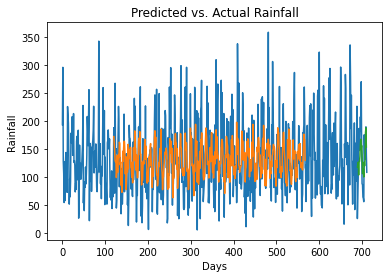

In [33]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Days')
plt.ylabel('Rainfall')
plt.title("Predicted vs. Actual Rainfall")
plt.show()

In [34]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [35]:
Y_val

0      25.3
1      63.0
2      98.8
3     182.2
4     186.2
5     146.8
6     177.2
7     207.0
8     181.3
9     269.7
10    155.0
11     87.3
12     86.2
13     63.7
14     61.4
15     55.4
16    174.9
17    142.2
18    131.2
19    150.6
20    189.1
21    139.1
dtype: float64

In [36]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [37]:
predictions

0     117.463333
1     119.098862
2     125.916443
3     103.070442
4     126.245529
5     127.300949
6     136.687866
7     156.903275
8     167.020340
9     149.326843
10    155.733475
11    140.117264
12    105.532478
13    106.735428
14    113.520691
15     99.624054
16    126.319084
17    119.491379
18    130.684204
19    178.467545
20    187.349121
21    153.102386
dtype: float32

In [38]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [39]:
mda(Y_val, predictions)

0.9090909090909091

In [40]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 49.998789


In [41]:
forecast_error = (predictions-Y_val)
forecast_error

0      92.163333
1      56.098862
2      27.116443
3     -79.129558
4     -59.954471
5     -19.499051
6     -40.512134
7     -50.096725
8     -14.279660
9    -120.373157
10      0.733475
11     52.817264
12     19.332478
13     43.035428
14     52.120691
15     44.224054
16    -48.580916
17    -22.708621
18     -0.515796
19     27.867545
20     -1.750879
21     14.002386
dtype: float64

In [42]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-1.267682231556286

In [43]:
X_train

array([[[0.53242707, 0.82242991, 0.34806004, ..., 0.21042198,
         0.16765789, 0.28518833]],

       [[0.82242991, 0.34806004, 0.28632116, ..., 0.16765789,
         0.28518833, 0.51713396]],

       [[0.34806004, 0.28632116, 0.13848768, ..., 0.28518833,
         0.51713396, 0.49079581]],

       ...,

       [[0.25035401, 0.06513735, 0.55451713, ..., 0.49221184,
         0.48994619, 0.53044463]],

       [[0.06513735, 0.55451713, 0.23789295, ..., 0.48994619,
         0.53044463, 0.72302464]],

       [[0.55451713, 0.23789295, 0.10676862, ..., 0.53044463,
         0.72302464, 0.56046446]]])

In [44]:
X_train.shape

(448, 1, 120)

In [45]:
# Test (unseen) predictions
Xnew = np.array([tseries.iloc[592:712],tseries.iloc[593:713],tseries.iloc[594:714],tseries.iloc[595:715],tseries.iloc[596:716],tseries.iloc[597:717],tseries.iloc[598:718],tseries.iloc[599:719],tseries.iloc[600:720],tseries.iloc[601:721]])

In [46]:
Xnew

array([[123.1, 110.8, 128.8, ..., 189.1, 139.1, 107.9],
       [110.8, 128.8,  67.5, ..., 139.1, 107.9, 227.3],
       [128.8,  67.5, 243.8, ..., 107.9, 227.3,  92.6],
       ...,
       [132.3, 322.6, 133.8, ...,  84.1, 221.9, 166.3],
       [322.6, 133.8,  86. , ..., 221.9, 166.3, 152. ],
       [133.8,  86. ,  69.1, ..., 166.3, 152. , 142.5]])

In [47]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [48]:
Xnew.shape

(10, 120)

In [49]:
ynew

array([[0.402638  ],
       [0.3522824 ],
       [0.13839081],
       [0.3158755 ],
       [0.31704006],
       [0.46124998],
       [0.5571617 ],
       [0.43296877],
       [0.5010153 ],
       [0.40076387]], dtype=float32)

In [50]:
type(ynew)

numpy.ndarray

In [51]:
ynew.shape

(10, 1)

In [52]:
actual=tseries.iloc[712:722]
actual

712    227.3
713     92.6
714    110.5
715     74.8
716     84.1
717    221.9
718    166.3
719    152.0
720    142.5
721    217.3
Name: rain, dtype: float64

In [53]:
type(actual)

pandas.core.series.Series

In [54]:
actual = np.array(actual)
actual

array([227.3,  92.6, 110.5,  74.8,  84.1, 221.9, 166.3, 152. , 142.5,
       217.3])

In [55]:
actual=actual.reshape(10,-1)
actual.shape

(10, 1)

In [56]:
actual

array([[227.3],
       [ 92.6],
       [110.5],
       [ 74.8],
       [ 84.1],
       [221.9],
       [166.3],
       [152. ],
       [142.5],
       [217.3]])

In [57]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [58]:
np.min(df)

0.0

In [59]:
ynew

array([0.402638  , 0.3522824 , 0.13839081, 0.3158755 , 0.31704006,
       0.46124998, 0.5571617 , 0.43296877, 0.5010153 , 0.40076387],
      dtype=float32)

In [60]:
maxt=np.max(tseries)

In [61]:
mint=np.min(tseries)

In [62]:
ynew = ynew * np.abs(maxt-mint) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [63]:
actualpd

0    227.3
1     92.6
2    110.5
3     74.8
4     84.1
5    221.9
6    166.3
7    152.0
8    142.5
9    217.3
dtype: float64

In [64]:
ynewpd

0    147.171478
1    129.390930
2     53.865795
3    116.535645
4    116.946846
5    167.867371
6    201.733795
7    157.881271
8    181.908508
9    146.509720
dtype: float32

In [65]:
mda(actualpd, ynewpd)

0.8

In [66]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 49.574517


In [67]:
forecast_error = (ynewpd-actualpd)
forecast_error

0   -80.128522
1    36.790930
2   -56.634205
3    41.735645
4    32.846846
5   -54.032629
6    35.433795
7     5.881271
8    39.408508
9   -70.790280
dtype: float64

In [68]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-6.948864059448245

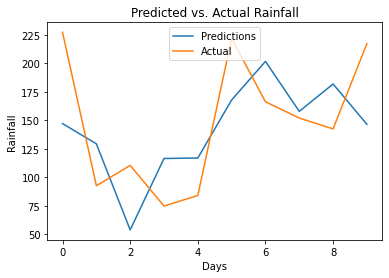

In [69]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Days')
plt.ylabel('Rainfall')
plt.title("Predicted vs. Actual Rainfall")
plt.legend(loc = 'upper center')
plt.show()